In [ ]:
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt


In [ ]:
transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [ ]:
train_data=torchvision.datasets.CIFAR100(root='./data',train=True,download=True,transform=transforms)
test_data=torchvision.datasets.CIFAR100(root='./data',train=False,download=True,transform=transforms)
train_loader=DataLoader(train_data,batch_size=32,shuffle=True, num_workers=2)
test_loader=DataLoader(test_data,batch_size=32,shuffle=True, num_workers=2)

100%|██████████| 169001437/169001437 [00:05<00:00, 29588048.93it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
train_loader=DataLoader(train_data,batch_size=32,shuffle=True, num_workers=2)
test_loader=DataLoader(test_data,batch_size=32,shuffle=True, num_workers=2)

In [ ]:
image,label=train_data[0]
print(image.shape)
print(label)

torch.Size([3, 32, 32])
19


In [ ]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl',
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee',
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish',
    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange',
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe',
    'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(3,12,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(12,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,100)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

NameError: name 'Net' is not defined

[1, 1563] loss: 4.605
[2, 1563] loss: 4.582
[3, 1563] loss: 4.187
[4, 1563] loss: 3.928
[5, 1563] loss: 3.776
[6, 1563] loss: 3.635
[7, 1563] loss: 3.497
[8, 1563] loss: 3.370
[9, 1563] loss: 3.253
[10, 1563] loss: 3.153
[11, 1563] loss: 3.071
[12, 1563] loss: 2.989
[13, 1563] loss: 2.923
[14, 1563] loss: 2.856
[15, 1563] loss: 2.803
[16, 1563] loss: 2.744
[17, 1563] loss: 2.697
[18, 1563] loss: 2.652
[19, 1563] loss: 2.609
[20, 1563] loss: 2.571
[21, 1563] loss: 2.530
[22, 1563] loss: 2.493
[23, 1563] loss: 2.464
[24, 1563] loss: 2.429
[25, 1563] loss: 2.396
[26, 1563] loss: 2.365
[27, 1563] loss: 2.335
[28, 1563] loss: 2.305
[29, 1563] loss: 2.280
[30, 1563] loss: 2.253
[31, 1563] loss: 2.229
[32, 1563] loss: 2.203
[33, 1563] loss: 2.179
[34, 1563] loss: 2.158
[35, 1563] loss: 2.134
[36, 1563] loss: 2.113
[37, 1563] loss: 2.091
[38, 1563] loss: 2.070
[39, 1563] loss: 2.049
[40, 1563] loss: 2.028
[41, 1563] loss: 2.011
[42, 1563] loss: 1.995
[43, 1563] loss: 1.980
[44, 1563] loss: 1.9

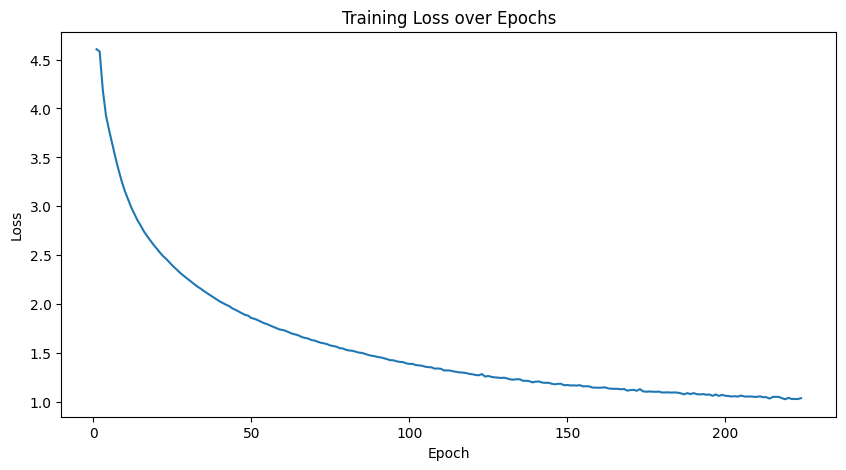

In [ ]:

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(3,12,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(12,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,100)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
best_loss = float('inf')
patience = 5
counter = 0
best_model_params = None

# List to store losses for plotting
losses = []

for epoch in range(300):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average loss for this epoch
    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)

    print(f'[{epoch+1},{i+1:5d}] loss: {avg_loss:.3f}')

    # Early stopping and best model saving logic
    if avg_loss < best_loss:
        best_loss = avg_loss
        counter = 0
        best_model_params = net.state_dict().copy()
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            net.load_state_dict(best_model_params)
            break

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
best_model_params

OrderedDict([('conv1.weight',
              tensor([[[[ 4.2356e-02, -2.6434e-01, -3.2597e-01,  1.4990e-01,  6.1331e-02],
                        [-7.6860e-01,  3.8451e-01,  1.4515e+00,  4.6726e-01, -3.2188e-01],
                        [ 7.4735e-02, -1.1591e-02,  4.5483e-01, -1.4621e-01, -2.9819e-01],
                        [ 3.4098e-01,  1.2641e-01, -9.3806e-01, -1.2548e-01,  2.3202e-01],
                        [ 2.3201e-01, -1.0563e-01, -4.1199e-01,  9.9679e-02, -3.7668e-02]],
              
                       [[ 8.8515e-02,  2.7968e-01,  2.3502e-02,  1.9113e-01, -8.5097e-02],
                        [-6.1769e-01,  1.6189e-01,  1.0527e+00,  4.2493e-01, -5.6327e-01],
                        [ 4.0239e-01, -9.8443e-02,  6.3074e-02, -2.9869e-01,  1.1574e-01],
                        [ 5.1815e-01,  6.6868e-03, -1.1405e+00, -5.9465e-01,  8.4608e-01],
                        [-1.9818e-02, -5.9203e-01, -4.4068e-01,  8.7929e-02, -4.1355e-02]],
              
                       [[ 1.

In [ ]:
torch.save(net.state_dict(),'cnnet_224epoch.pth')

In [ ]:
correct=0
total=0
net.eval()
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    outputs=net(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

acc=100*correct/total
print(f'Accuracy : {acc}%')

Accuracy of the network on the 10000 test images: 27.32%


In [ ]:
class tinyNet(nn.Module):
  def __init__(self):
    super(tinyNet,self).__init__()
    self.conv1=nn.Conv2d(3,12,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(12,16,5)
    self.fc1=nn.Linear(16*5*5,1024)
    self.fc2=nn.Linear(1024,512)
    self.fc3=nn.Linear(512,256)
    self.fc4=nn.Linear(256,100)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
net2=tinyNet()
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(net2.parameters(),lr=0.001,momentum=0.9)

[1, 1563] loss: 4.789
[2, 1563] loss: 4.006
[3, 1563] loss: 3.734
[4, 1563] loss: 3.503
[5, 1563] loss: 3.311
[6, 1563] loss: 3.158
[7, 1563] loss: 3.024
[8, 1563] loss: 2.902
[9, 1563] loss: 2.780
[10, 1563] loss: 2.662
[11, 1563] loss: 2.550
[12, 1563] loss: 2.439
[13, 1563] loss: 2.331
[14, 1563] loss: 2.220
[15, 1563] loss: 2.113
[16, 1563] loss: 1.994
[17, 1563] loss: 1.872
[18, 1563] loss: 1.748
[19, 1563] loss: 1.619
[20, 1563] loss: 1.488
[21, 1563] loss: 1.350
[22, 1563] loss: 1.216
[23, 1563] loss: 1.084
[24, 1563] loss: 0.958
[25, 1563] loss: 0.844
[26, 1563] loss: 0.736
[27, 1563] loss: 0.638
[28, 1563] loss: 0.552
[29, 1563] loss: 0.489
[30, 1563] loss: 0.435
[31, 1563] loss: 0.371
[32, 1563] loss: 0.331
[33, 1563] loss: 0.300
[34, 1563] loss: 0.281
[35, 1563] loss: 0.226
[36, 1563] loss: 0.187
[37, 1563] loss: 0.187
[38, 1563] loss: 0.182
[39, 1563] loss: 0.181
[40, 1563] loss: 0.180
[41, 1563] loss: 0.166
[42, 1563] loss: 0.166
[43, 1563] loss: 0.121
[44, 1563] loss: 0.0

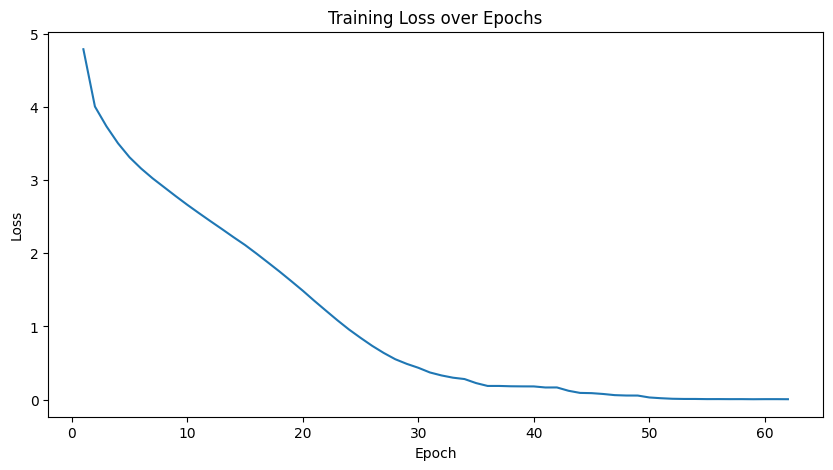

In [ ]:


best_loss = float('inf')
patience = 3
counter = 0
best_model_params = None

losses = []

for epoch in range(300):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net2(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)

    print(f'[{epoch+1},{i+1:5d}] loss: {avg_loss:.3f}')

    if avg_loss < best_loss:
        best_loss = avg_loss
        counter = 0
        best_model_params = net2.state_dict().copy()
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            net2.load_state_dict(best_model_params)
            break

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
torch.save(net2.state_dict(),'tinycnnet_62epoch.pth')

In [ ]:
correct=0
total=0
net2.eval()
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    outputs=net2(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

acc=100*correct/total
print(f'Accuracy : {acc}%')

Accuracy of the network on the 10000 test images: 33.32%


In [ ]:
import torch
import torch.nn as nn
from torch.nn import (Conv2d, Linear, MaxPool2d, Module, ReLU, Sequential, Softmax)
from typing import Callable, Optional

ActivT = Optional[Callable[[], Module]]

def make_conv_pool_activ(
    in_channels: int,
    out_channels: int,
    kernel_size: int,
    activation: ActivT = None,
    pool_size: Optional[int] = None,
    pool_stride: Optional[int] = None,
    **conv_kwargs
):
    layers = [Conv2d(in_channels, out_channels, kernel_size, **conv_kwargs)]
    if activation:
        layers.append(activation())
    if pool_size is not None:
        layers.append(MaxPool2d(pool_size, stride=pool_stride))
    return layers

class Classifier(Module):
    def __init__(
        self, convs: Sequential, linears: Sequential, use_softmax: bool = True
    ):
        super().__init__()
        self.convs = convs
        self.linears = linears
        self.softmax = Softmax(1) if use_softmax else Sequential()

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        outputs = self.convs(inputs)
        return self.softmax(self.linears(outputs.view(outputs.shape[0], -1)))

class BasicBlock(Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = Sequential(
                Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = ReLU()(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = ReLU()(out)
        return out

class ResNet18(Classifier):
    def __init__(self, num_classes=100):  # Assuming 100 classes as in your original code
        self.in_planes = 64

        def _make_layer(block, planes, num_blocks, stride):
            strides = [stride] + [1]*(num_blocks-1)
            layers = []
            for stride in strides:
                layers.append(block(self.in_planes, planes, stride))
                self.in_planes = planes * block.expansion
            return Sequential(*layers)

        convs = Sequential(
            *make_conv_pool_activ(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            ReLU(),
            MaxPool2d(kernel_size=3, stride=2, padding=1),
            _make_layer(BasicBlock, 64, 2, 1),
            _make_layer(BasicBlock, 128, 2, 2),
            _make_layer(BasicBlock, 256, 2, 2),
            _make_layer(BasicBlock, 512, 2, 2),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        linears = Sequential(Linear(512 * BasicBlock.expansion, num_classes))
        super().__init__(convs, linears)

def model(file=None):
    net = ResNet18().float()
    if file is not None:
        net.load_state_dict(torch.load(file))
    return net

In [ ]:
train_data=torchvision.datasets.CIFAR100(root='./data',train=True,download=True,transform=transforms)
test_data=torchvision.datasets.CIFAR100(root='./data',train=False,download=True,transform=transforms)
train_loader=DataLoader(train_data,batch_size=32,shuffle=True, num_workers=2)
test_loader=DataLoader(test_data,batch_size=32,shuffle=True, num_workers=2)

NameError: name 'torchvision' is not defined

In [ ]:
resnet = ResNet18().float()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

NameError: name 'optim' is not defined

[1, 1563] loss: 4.591
[2, 1563] loss: 4.557
[3, 1563] loss: 4.528
[4, 1563] loss: 4.501
[5, 1563] loss: 4.487
[6, 1563] loss: 4.479
[7, 1563] loss: 4.472
[8, 1563] loss: 4.463
[9, 1563] loss: 4.456
[10, 1563] loss: 4.450
[11, 1563] loss: 4.445
[12, 1563] loss: 4.437
[13, 1563] loss: 4.433
[14, 1563] loss: 4.429
[15, 1563] loss: 4.424
